# Heart attack prediction

In this notebook, we will predict the likelihood of a heart attack using 3 models: logistic regression, random forest and K-nearest neighbors.

We will measure efficiency of each model by 4 metrics: accuracy, F1 score, precision and recall.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Data download

Please, write your Kaggle username and key below.

In [2]:
import json 
import os
from pathlib import Path

# your api key
api_key = {
'username':"username" ,  # Edit this line.
'key':"key"}  # Edit this line.

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object 
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)  

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
filename = 'heart.csv'
api.dataset_download_file('rashikrahmanpritom/heart-attack-analysis-prediction-dataset', file_name=filename, path='./')

True

In [4]:
df = pd.read_csv(filename).dropna()
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data preparation

In [5]:
df.describe().round(decimals=0)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


**Let us split the data into train and test.**

In [32]:
X = df.iloc[:,:-1]
y = df['output']  
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
# Scale data with a standard scaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

## Models

### Logistic regression

In [34]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr_model.predict(X_train)

In [36]:
lr_acc = accuracy_score(y_train, y_pred)
lr_f1 = f1_score(y_train, y_pred)
lr_recall = recall_score(y_train, y_pred)
lr_precision = precision_score(y_train, y_pred)
lr_metrics_train = [lr_acc * 100, lr_f1 * 100, lr_recall * 100, lr_precision * 100]

print("Accuracy: {:.2f}%".format(lr_metrics_train[0]))
print("F1 Score: {:.2f}%".format(lr_metrics_train[1]))
print("Recall: {:.2f}%".format(lr_metrics_train[2]))
print("Precision: {:.2f}%".format(lr_metrics_train[3]))

Accuracy: 86.34%
F1 Score: 88.03%
Recall: 91.94%
Precision: 84.44%


In [37]:
y_pred = lr_model.predict(X_test)

In [38]:
lr_acc = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_metrics = [lr_acc * 100, lr_f1 * 100, lr_recall * 100, lr_precision * 100]

print("Accuracy: {:.2f}%".format(lr_metrics[0]))
print("F1 Score: {:.2f}%".format(lr_metrics[1]))
print("Recall: {:.2f}%".format(lr_metrics[2]))
print("Precision: {:.2f}%".format(lr_metrics[3]))

Accuracy: 82.89%
F1 Score: 84.71%
Recall: 87.80%
Precision: 81.82%


As we can see from the results above, the linear regression model seems to overfit the data a little bit. Metrics for the training set are better than for the test set.

### Random forest

In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = rf_model.predict(X_train)

In [50]:
rf_acc = accuracy_score(y_train, y_pred)
rf_f1 = f1_score(y_train, y_pred)
rf_recall = recall_score(y_train, y_pred)
rf_precision = precision_score(y_train, y_pred)
rf_metrics_train = [rf_acc * 100, rf_f1 * 100, rf_recall * 100, rf_precision * 100]

print("Accuracy: {:.2f}%".format(rf_metrics_train[0]))
print("F1 Score: {:.2f}%".format(rf_metrics_train[1]))
print("Recall: {:.2f}%".format(rf_metrics_train[2]))
print("Precision: {:.2f}%".format(rf_metrics_train[3]))

Accuracy: 100.00%
F1 Score: 100.00%
Recall: 100.00%
Precision: 100.00%


In [51]:
y_pred = rf_model.predict(X_test)

In [52]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_metrics = [rf_acc * 100, rf_f1 * 100, rf_recall * 100, rf_precision * 100]

print("Accuracy: {:.2f}%".format(rf_metrics[0]))
print("F1 Score: {:.2f}%".format(rf_metrics[1]))
print("Recall: {:.2f}%".format(rf_metrics[2]))
print("Precision: {:.2f}%".format(rf_metrics[3]))

Accuracy: 72.37%
F1 Score: 74.07%
Recall: 73.17%
Precision: 75.00%


Random forest definitely overfits the data, since it fits in training data perfectly and performs poorly on the test set.

### K-nearest neighbors

In [69]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn_model.predict(X_train)

In [71]:
knn_acc = accuracy_score(y_train, y_pred)
knn_f1 = f1_score(y_train, y_pred)
knn_recall = recall_score(y_train, y_pred)
knn_precision = precision_score(y_train, y_pred)
knn_metrics_train = [knn_acc * 100, knn_f1 * 100, knn_recall * 100, knn_precision * 100]

print("Accuracy: {:.2f}%".format(knn_metrics_train[0]))
print("F1 Score: {:.2f}%".format(knn_metrics_train[1]))
print("Recall: {:.2f}%".format(knn_metrics_train[2]))
print("Precision: {:.2f}%".format(knn_metrics_train[3]))

Accuracy: 89.87%
F1 Score: 90.91%
Recall: 92.74%
Precision: 89.15%


In [72]:
y_pred = knn_model.predict(X_test)

In [73]:
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_metrics = [knn_acc * 100, knn_f1 * 100, knn_recall * 100, knn_precision * 100]

print("Accuracy: {:.2f}%".format(knn_metrics[0]))
print("F1 Score: {:.2f}%".format(knn_metrics[1]))
print("Recall: {:.2f}%".format(knn_metrics[2]))
print("Precision: {:.2f}%".format(knn_metrics[3]))

Accuracy: 82.89%
F1 Score: 85.06%
Recall: 90.24%
Precision: 80.43%


KNN also overfits the data, but not as much as random forest.

## Comparison

Let us take the metrics resulted from testing the models and compare them.

In [74]:
models = ["Logistic regression", "Random forest", "K-nearest neighbors"]
accuracy = [lr_metrics[0], rf_metrics[0], knn_metrics[0]]
f1 = [lr_metrics[1], rf_metrics[1], knn_metrics[1]]
recall = [lr_metrics[2], rf_metrics[2], knn_metrics[2]]
precision = [lr_metrics[3], rf_metrics[3], knn_metrics[3]]

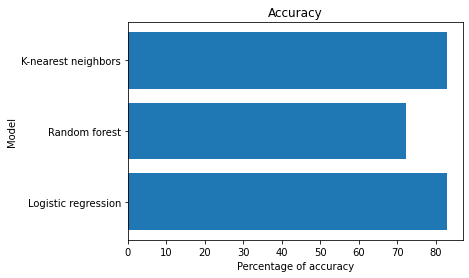

In [75]:
plt.barh(models, accuracy)
plt.xlabel("Percentage of accuracy")
plt.ylabel("Model")
plt.title("Accuracy")
plt.show()

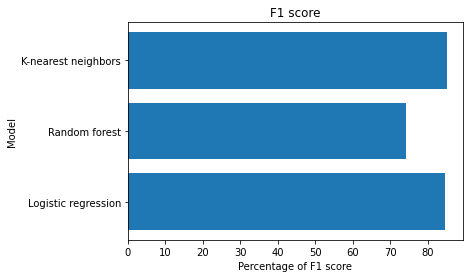

In [76]:
plt.barh(models, f1)
plt.xlabel("Percentage of F1 score")
plt.ylabel("Model")
plt.title("F1 score")
plt.show()

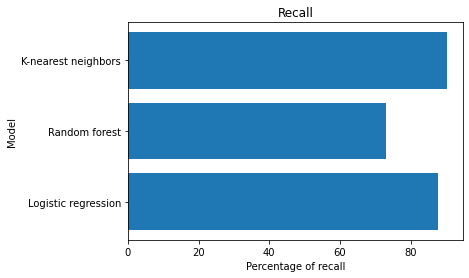

In [77]:
plt.barh(models, recall)
plt.xlabel("Percentage of recall")
plt.ylabel("Model")
plt.title("Recall")
plt.show()

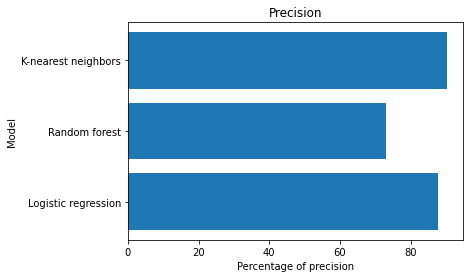

In [78]:
plt.barh(models, recall)
plt.xlabel("Percentage of precision")
plt.ylabel("Model")
plt.title("Precision")
plt.show()

**Observations and conclusions**

As we can see from the bar plots above, the metrics of KNN and logistic regression are very similar. We can highlight KNN for outperforming all the models. Random forest performed the worst in all the metrics. It also overfits the data the most. However, in general the models give good results.

There could be done some work with overfitting through regularization etc. in order to improve the models. The hyperparameters could also be tuned.